# <span style = 'color:blue'> Problem statement : Perform sentiment analysis on Hindenberg report, data fetching directly from twitter</span>

**Sentiment analysis is the process of identifying feelings and emotions expressed in words, through ML or AI**

**Project Pipeline**

Various steps in completing project are

- **Import Necessary Dependencies**
- **Read and Load the Dataset**
- **Exploratory Data Analysis**
- **Data Visualization of Target Variables**
- **Data Preprocessing**
- **Splitting our data into Train and Test Subset**
- **Transforming Dataset using TF-IDF Vectorizer**
- **Function for Model Evaluation**
- **Model Building**
- **Conclusion**

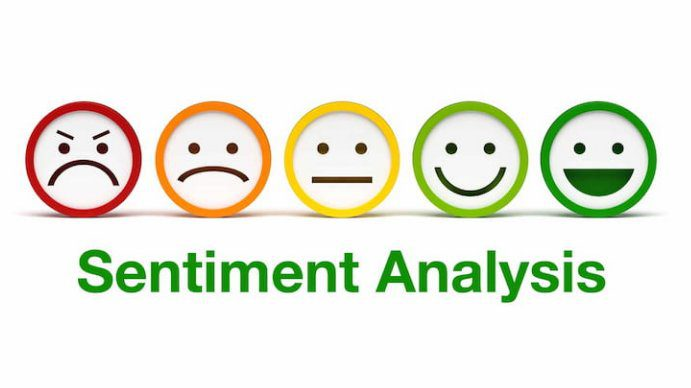

In [1]:
# Importing libraries for Scraping the Data
import pandas as pd
import snscrape.modules.twitter as sntwitter 

# Scrapping tweets using snscrape

In [2]:
#scraper3=sntwitter.TwitterSearchScraper('Hindenberg report')

In [3]:
# tweets=[]
# for i,tweet in enumerate(scraper3.get_items()):
#     data=[tweet.date,tweet.id,tweet.content,tweet.likeCount,tweet.retweetCount]
#     tweets.append(data)
#     if i >1000:
#         break

In [4]:
#df3=pd.DataFrame(tweets,columns=['date','id','Tweets','likes','retweets'])

In [36]:
df3.shape

(1002, 5)

In [38]:
#df3.to_csv('HindenBerg_Report.csv')

# Libraries required

In [6]:
#Libraries 
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import os

# Import functions for data preprocessing & data preparation
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import resample
from sklearn.feature_extraction.text import CountVectorizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer

from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer, LancasterStemmer
from nltk.stem.snowball import SnowballStemmer
from nltk.corpus import stopwords
from nltk.corpus import wordnet
import string
from string import punctuation
import nltk
import re

# Importing the Dataset

In [7]:
df=pd.read_csv('HindenBerg_Report.csv')

In [8]:
df.head()

,Unnamed: 0,date,id,Tweets,likes,retweets
0,0,2023-02-07 10:44:03+00:00,1622909048017375232,@hegade_u @JhaSanjay Let this Jha2 read carefu...,0,0
1,1,2023-02-07 10:30:27+00:00,1622905625163481089,@CursedSe7en @Memeghnad Yes and like RG bashed...,0,0
2,2,2023-02-07 10:19:54+00:00,1622902969892220929,@_pallavighosh ji So @RahulGandhi has spoken o...,0,0
3,3,2023-02-07 10:12:47+00:00,1622901179343843328,With so much venom being spewed by Congress dy...,0,0
4,4,2023-02-07 10:01:35+00:00,1622898358758293510,Hindenberg is banned by SEC from participating...,2,0


In [9]:
df.shape

(1002, 6)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1002 entries, 0 to 1001
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1002 non-null   int64 
 1   date        1002 non-null   object
 2   id          1002 non-null   int64 
 3   Tweets      1002 non-null   object
 4   likes       1002 non-null   int64 
 5   retweets    1002 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 47.1+ KB


In [11]:
# the Id and Unnamed: 0 columns not providing any important information to us..so we will better remove it
df=df.drop(['Unnamed: 0','id'],axis=1) 

In [12]:
df.describe()

,likes,retweets
count,1002.000000,1002.000000
mean,8.251497,1.962076
std,57.189998,12.707599
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,2.000000,0.000000
max,1217.000000,245.000000


- **There are Outliers in the data..in Likes and Retweet Columns**


# Drop the Duplicated Tweets

In [13]:
df.duplicated(subset='Tweets').sum()

1

In [14]:
# There is 1 Duplicated tweet in our Data..lets Remove it
df.drop_duplicates(subset='Tweets',inplace=True)

In [15]:
df.duplicated(subset='Tweets').sum()

0

In [16]:
df.shape

(1001, 4)

We succesfully removed Duplicated Row

In [17]:
# Converting Date column from object to datetime format
df['date']=pd.to_datetime(df['date'])

# Most liked tweets

In [18]:
df.sort_values(by='likes',ascending=False).head(20)

,date,Tweets,likes,retweets
805,2023-02-02 03:58:07+00:00,Congress whip In Lok Sabha Mr @manickamtagore ...,1217,245
543,2023-02-03 08:25:33+00:00,That Hindenberg is in this to make money by sh...,939,138
126,2023-02-06 05:14:46+00:00,Mutual funds in india and elsewhere had very l...,476,132
93,2023-02-06 09:46:57+00:00,Hindenberg report is not an Hitjob on Indian e...,381,115
372,2023-02-04 06:16:09+00:00,"From this, I can tell you that all these joker...",369,66
707,2023-02-02 13:26:29+00:00,CONNECT THE DOTS: players in Bharath Jodo Yatr...,314,168
537,2023-02-03 09:30:00+00:00,#NLTippani: खबरिया चैनलों ने #HindenbergReport...,218,46
360,2023-02-04 07:07:33+00:00,"Did you know, Hindenberg Report is named after...",215,15
292,2023-02-04 15:16:37+00:00,✅Hindenberg Report Explained\n✅Adani response ...,213,31
688,2023-02-02 15:00:03+00:00,"#NLCharcha: ""चमत्कार दिखाने वाले ये क्यों नहीं...",177,34


# Tweets frequency by Day and Hour wise analysis

In [19]:
import datetime as dt
tweets_per_hour = df['date'].dt.strftime('%H').value_counts().sort_index().reset_index(name='counts')


<AxesSubplot:>

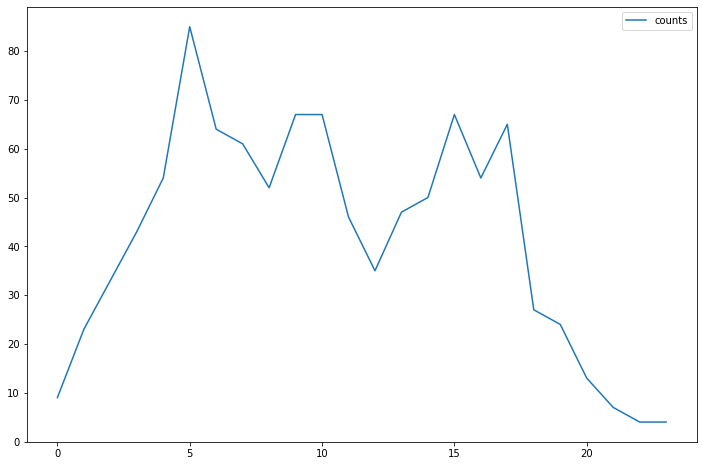

In [20]:
tweets_per_hour.plot(figsize=(12,8))

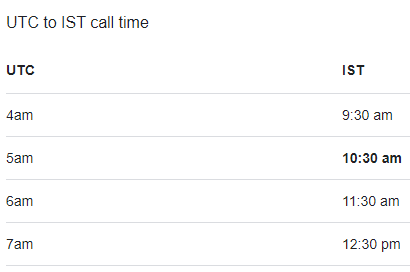

In [21]:
tweets_per_day = df['date'].dt.strftime('%D').value_counts().sort_index().reset_index(name='counts')

In [22]:
tweets_per_day=tweets_per_day.set_index('index')

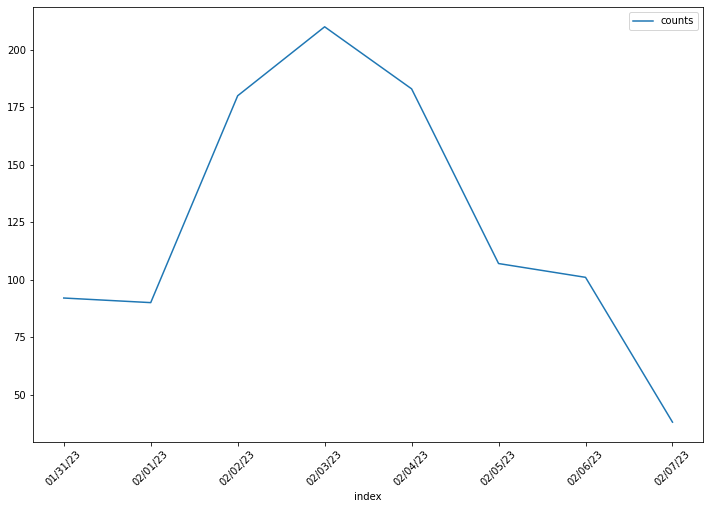

In [23]:
tweets_per_day.plot(figsize=(12,8))
plt.xticks(rotation=45)
plt.show()

### Inference- 
- **On 3rd Feb 2023 people tweeed most regarding Hindenberg Report and it was hot topic on that day.**
- **As per Indian Standard Time People mostly tweeted on this matter at morning most which is around 11 am**

# Correlation map

<AxesSubplot:>

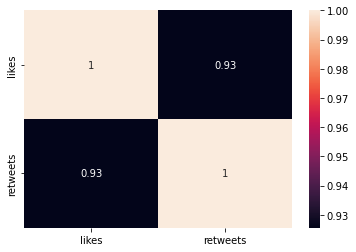

In [24]:
import seaborn as sns
sns.heatmap(df.corr(),annot=True)

### There is very high positive correlation between Likes and Retweets..we might need to drop one column to avoid multicolinearity in future

<AxesSubplot:xlabel='likes'>

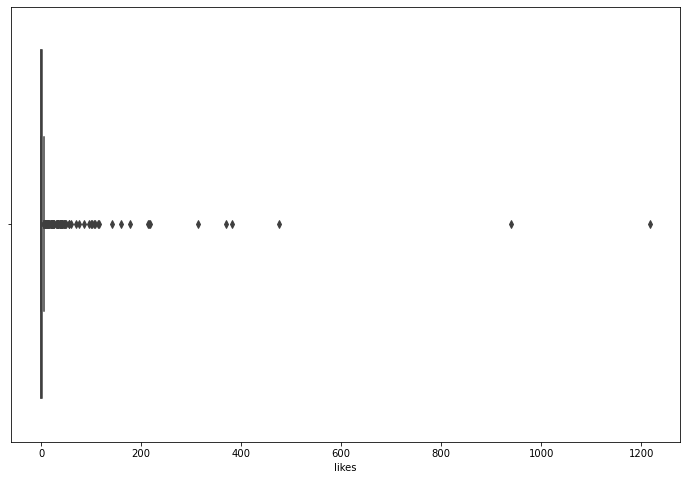

In [25]:
plt.figure(figsize=(12,8))
sns.boxplot(data=df,x='likes')


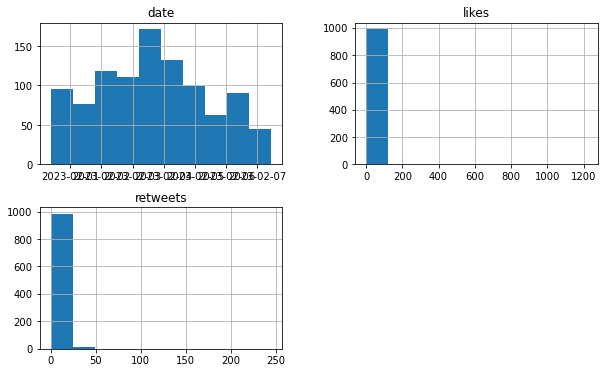

In [26]:
df.hist(figsize=(10,6));

C:\Users\91801\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='likes', ylabel='Density'>

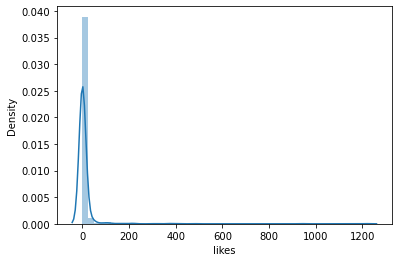

In [27]:

sns.distplot(df['likes'])

<AxesSubplot:xlabel='likes', ylabel='retweets'>

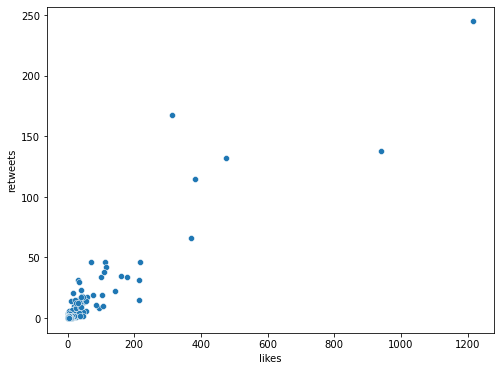

In [28]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='likes',y='retweets',data=df)

1- **We can see clearly see Linear Trend between likes and Retweets**<br>
2- **there are some outliers in our Data particulary in Likes and retweets columns**


# Text preprocessing

In [29]:
#!pip install langdetect

In [30]:
# Removing all rows which having local languges used..we will only keeping those rows where English language present
from langdetect import detect



In [31]:
def keep_english(text):
    try:
        if detect(text) == 'en':
            return text
        else:
            return np.nan
    except:
        return np.nan

In [32]:
df['Tweets'].apply(keep_english).isnull().sum()

174

There are total 174 rows which are having other text than English

In [33]:
new_df=df['Tweets'].apply(keep_english)

In [34]:
new_df=pd.DataFrame({'Tweets':new_df})

In [35]:
li=new_df[new_df['Tweets'].isnull()].index.to_list()

In [36]:
# This are those tweets which are partially having local languges..so our model get confused if we did not filter that
pd.options.display.max_colwidth = 1000
Non_Eng=df.iloc[li].Tweets
Non_Eng.sample(15)

985       Due to Hindenberg report there was a threat that Adani's FPO will not subscribe or it may be fail .\n\nBut it got fully subscribed that is a positve news for ADANI as well as indian market because it was a bigest FPO of india\n\nSo before BUDjet it is a good news for market
193                                                                                                                                                                                                                                  @elonmusk Looks like he read hindenberg report on Adani
889                                                                                                            In fact, in their response to Hindenberg Report, Adani group pointed out the very same thing. "We're rated AA", they said, as they should have. These ratings are not a joke.
250                                                               @Ms_Aflatoon @SrBachchan Kaise likh sakte modi , Ambani, Adani, hindenberg repo

In [37]:
new_df=new_df.dropna(subset=["Tweets"])

In [38]:
new_df.shape

(828, 1)

In [77]:
data1=new_df.copy()

# Data transformation


In [78]:
# Making statement text in lower case
data1['new_tweets']=data1['Tweets'].str.lower()
data1['new_tweets'].tail()

996     @indiatoday @szarabi @jugeshinder any amount o...
998     he may soon lose his crown as asia's wealthies...
999     to discredit india. remember the #barkhadutt p...
1000    @saurabh_mlagk pappus should short the stock i...
1001    @minhazmerchant @hindenburgres people have not...
Name: new_tweets, dtype: object

In [79]:
# Defining set containing all stopwords in English
stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from',
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're','s', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those',
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves']

In [80]:
# Cleaning and removing the above stop words list from the tweet text
pd.options.display.max_colwidth = 50
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in stopwordlist])
data1['new_tweets'] = data1['new_tweets'].apply(lambda text: cleaning_stopwords(text))
data1['new_tweets'].head()

0    @hegade_u @jhasanjay let jha2 read carefully d...
1    @cursedse7en @memeghnad yes like rg bashed ada...
2    @_pallavighosh ji @rahulgandhi spoken hindenbe...
3    much venom spewed congress dynast adani group ...
4    hindenberg banned sec participating us markets...
Name: new_tweets, dtype: object

In [81]:
def clean_tweet(tweet):
    # Remove hashtags, mentions, and URLs
    tweet = re.sub(r'#\w+', '', tweet)
    tweet = re.sub(r'@\w+', '', tweet)
    tweet = re.sub(r'https?://\S+', '', tweet)
    
    # Remove extra spaces
    tweet = re.sub(' +', ' ', tweet).strip()
    
    return tweet

data1['new_tweets'] = data1['new_tweets'].apply(lambda x: clean_tweet(x))
data1['new_tweets'].tail()

996     amount clarifications won't satisfy public lar...
998     may soon lose crown asia's wealthiest person l...
999     discredit india. remember pictures along danis...
1000       pappus short stock believe hindenberg report😁😁
1001    people not read hindenberg report adani's resp...
Name: new_tweets, dtype: object

In [82]:
data1['new_tweets'].head()

0    let jha2 read carefully drafted " legal discla...
1    yes like rg bashed adani, modi also bash adani...
2        ji spoken hindenberg report well parliament 😂
3    much venom spewed congress dynast adani group ...
4    hindenberg banned sec participating us markets...
Name: new_tweets, dtype: object

In [83]:
#Clean emojis from text
def remove_emoji(tweet):
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', tweet)
data1['new_tweets'] = data1['new_tweets'].apply(lambda text: remove_emoji(text))
data1['new_tweets'].head()

0    let jha2 read carefully drafted " legal discla...
1    yes like rg bashed adani, modi also bash adani...
2         ji spoken hindenberg report well parliament 
3    much venom spewed congress dynast adani group ...
4    hindenberg banned sec participating us markets...
Name: new_tweets, dtype: object

In [84]:
# Cleaning and removing punctuations
import string
english_punctuations = string.punctuation
punctuations_list = english_punctuations
def cleaning_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)
data1['new_tweets']= data1['new_tweets'].apply(lambda x: cleaning_punctuations(x))
data1['new_tweets'].tail()

996     amount clarifications wont satisfy public larg...
998     may soon lose crown asias wealthiest person lo...
999     discredit india remember pictures along danish...
1000         pappus short stock believe hindenberg report
1001    people not read hindenberg report adanis respo...
Name: new_tweets, dtype: object

In [85]:
# Cleaning and removing Numeric numbers
def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)
data1['new_tweets']= data1['new_tweets'].apply(lambda x: cleaning_numbers(x))
data1['new_tweets'].tail()

996     amount clarifications wont satisfy public larg...
998     may soon lose crown asias wealthiest person lo...
999     discredit india remember pictures along danish...
1000         pappus short stock believe hindenberg report
1001    people not read hindenberg report adanis respo...
Name: new_tweets, dtype: object

In [86]:
# Rechecking With Duuplicates
df1=data1.copy()
df1.head()
tweet_df= df1.drop_duplicates(subset='new_tweets')

In [87]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 810 entries, 0 to 1001
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Tweets      810 non-null    object
 1   new_tweets  810 non-null    object
dtypes: object(2)
memory usage: 19.0+ KB


In [63]:
#tweet_df.Sentiment.value_counts()  

# # Getting tokenization of tweet text

In [88]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\91801\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [89]:
import re
def keep_only_text(x):
    tweet = re.sub(r'[^\x00-\x7F]+', '', x)
    return tweet
tweet_df['new_tweets']= tweet_df['new_tweets'].apply(lambda x: keep_only_text(x))
tweet_df['new_tweets'].head()

C:\Users\91801\AppData\Local\Temp\ipykernel_8304\1743348290.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweet_df['new_tweets']= tweet_df['new_tweets'].apply(lambda x: keep_only_text(x))


0    let jha read carefully drafted  legal disclaim...
1    yes like rg bashed adani modi also bash adani ...
2         ji spoken hindenberg report well parliament 
3    much venom spewed congress dynast adani group ...
4    hindenberg banned sec participating us markets...
Name: new_tweets, dtype: object

In [90]:
def tokenize(x):
    tokens = word_tokenize(x)
    return tokens
tweet_df['new_tweets']= tweet_df['new_tweets'].apply(lambda x: tokenize(x))
tweet_df['new_tweets'].head()

C:\Users\91801\AppData\Local\Temp\ipykernel_8304\335597769.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweet_df['new_tweets']= tweet_df['new_tweets'].apply(lambda x: tokenize(x))


0    [let, jha, read, carefully, drafted, legal, di...
1    [yes, like, rg, bashed, adani, modi, also, bas...
2    [ji, spoken, hindenberg, report, well, parliam...
3    [much, venom, spewed, congress, dynast, adani,...
4    [hindenberg, banned, sec, participating, us, m...
Name: new_tweets, dtype: object

 # Applying Stemming

In [91]:
import nltk
st = nltk.PorterStemmer()
def stemming_on_text(x):
    text = [st.stem(word) for word in x]
    return text
tweet_df['new_tweets']= tweet_df['new_tweets'].apply(lambda x: stemming_on_text(x))
tweet_df['new_tweets'].head()

C:\Users\91801\AppData\Local\Temp\ipykernel_8304\2970057770.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweet_df['new_tweets']= tweet_df['new_tweets'].apply(lambda x: stemming_on_text(x))


0    [let, jha, read, care, draft, legal, disclaim,...
1    [ye, like, rg, bash, adani, modi, also, bash, ...
2    [ji, spoken, hindenberg, report, well, parliam...
3    [much, venom, spew, congress, dynast, adani, g...
4    [hindenberg, ban, sec, particip, us, market, a...
Name: new_tweets, dtype: object

# Applying Lemmatizer

In [92]:
nltk.download('omw-1.4')
nltk.download('wordnet')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\91801\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\91801\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [93]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
def lemmatizer_on_text(x):
    text=" ".join(x)
    lemmatized_word = lemmatizer.lemmatize(text)
    return lemmatized_word
tweet_df['new_tweets']= tweet_df['new_tweets'].apply(lambda x: lemmatizer_on_text(x))
tweet_df['new_tweets'].head()

C:\Users\91801\AppData\Local\Temp\ipykernel_8304\2439290434.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweet_df['new_tweets']= tweet_df['new_tweets'].apply(lambda x: lemmatizer_on_text(x))


0    let jha read care draft legal disclaim hindenb...
1    ye like rg bash adani modi also bash adani for...
2          ji spoken hindenberg report well parliament
3    much venom spew congress dynast adani group pa...
4    hindenberg ban sec particip us market also tak...
Name: new_tweets, dtype: object

In [94]:
from textblob import TextBlob
pol = lambda x:TextBlob(x).sentiment.polarity
sub = lambda x:TextBlob(x).sentiment.subjectivity

tweet_df['polarity'] = tweet_df['new_tweets'].apply(pol)
tweet_df['subjectivity'] = tweet_df['new_tweets'].apply(sub)

tweet_df.head(5)

C:\Users\91801\AppData\Local\Temp\ipykernel_8304\2973391821.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweet_df['polarity'] = tweet_df['new_tweets'].apply(pol)
C:\Users\91801\AppData\Local\Temp\ipykernel_8304\2973391821.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweet_df['subjectivity'] = tweet_df['new_tweets'].apply(sub)


,Tweets,new_tweets,polarity,subjectivity
0,@hegade_u @JhaSanjay Let this Jha2 read carefu...,let jha read care draft legal disclaim hindenb...,0.200000,0.200000
1,@CursedSe7en @Memeghnad Yes and like RG bashed...,ye like rg bash adani modi also bash adani for...,0.000000,0.000000
2,@_pallavighosh ji So @RahulGandhi has spoken o...,ji spoken hindenberg report well parliament,0.000000,0.000000
3,With so much venom being spewed by Congress dy...,much venom spew congress dynast adani group pa...,0.007273,0.407576
4,Hindenberg is banned by SEC from participating...,hindenberg ban sec particip us market also tak...,-0.100000,0.600000


In [ ]:
def sentiment_analysis(text):
    sentiment = TextBlob(text).sentiment.polarity
    if sentiment >0:
        return "Positive"
    #elif sentiment == 0:
        #return "Neutral"
    else:
        return "Negative"
tweet_df['sentiments']= tweet_df['new_tweets'].apply(lambda text: sentiment_analysis(text))
tweet_df.head()

In [96]:
tweet_df.sentiments.value_counts()

Negative    548
Positive    262
Name: sentiments, dtype: int64

# Plot a cloud of words for Positive and negative tweets

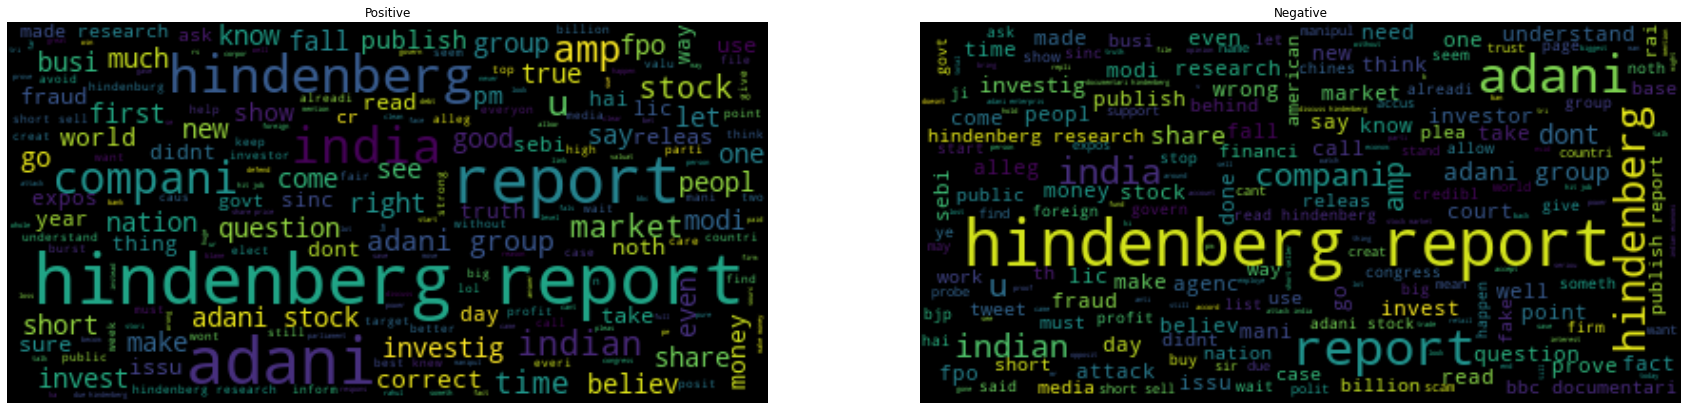

In [97]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Split the texts based on polarity
positive_texts = list(tweet_df[tweet_df.sentiments=='Positive']['new_tweets'])
negative_texts = list(tweet_df[tweet_df.sentiments=='Negative']['new_tweets'])


# Join the texts into a single string for each sentiment
positive_text = " ".join(positive_texts)
negative_text = " ".join(negative_texts)


# Generate word clouds for each sentiment
positive_wordcloud = WordCloud().generate(positive_text)
negative_wordcloud = WordCloud().generate(negative_text)


# Plot the word clouds
plt.figure(figsize=(30, 30))
plt.subplot(121)
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Positive")

plt.subplot(122)
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Negative")

# plt.subplot(133)
# plt.imshow(neutral_wordcloud, interpolation='bilinear')
# plt.axis("off")
# plt.title("Neutral")

plt.show()


In [101]:
pd.options.display.max_colwidth = 1000
tweet_df[tweet_df.sentiments=='Positive']['Tweets']

0                                     @hegade_u @JhaSanjay Let this Jha2 read carefully drafted " legal disclaimer" by Hindenberg with selected words to keep their safety and to avoid their accountability,responsibility from the source of their information and their findings in their report .
3                  With so much venom being spewed by Congress dynast on Adani group in parliament it is clear who is behind Hindenberg report. Never in the history of Independent India has an  Industrialist been personally targeted in parliament. Congress party's scion has stooped to new low
6                                                    Adani group faces the severe losses of $100 BILLION since hindenberg report, but different business experts, analyst, coaches came into the front foot and exposed the hindenberg report and said that ADANI group is very fundamentally strong.
7                              A very intersting point raised by @RahulGandhi. The #HindenbergReport talked about shel

In [102]:
tweet_df[tweet_df.sentiments=='Negative']['Tweets']

1                                                                                                                                            @CursedSe7en @Memeghnad Yes and like RG bashed Adani, Modi should also bash Adani? Forget, He should just say He would investigate the shell companies mentioned in Hindenberg report.
2                                                                                                                                                                                                                                @_pallavighosh ji So @RahulGandhi has spoken on Hindenberg Report as well that too in parliament 😂
4                                                                                                                                                                                                        Hindenberg is banned by SEC from participating in US markets and also from taking out any report on any US listed company.
5                           

In [103]:
tweet_df.head()

,Tweets,new_tweets,polarity,subjectivity,sentiments
0,"@hegade_u @JhaSanjay Let this Jha2 read carefully drafted "" legal disclaimer"" by Hindenberg with selected words to keep their safety and to avoid their accountability,responsibility from the source of their information and their findings in their report .",let jha read care draft legal disclaim hindenberg select word keep safeti avoid accountabilityrespons sourc inform find report,0.200000,0.200000,Positive
1,"@CursedSe7en @Memeghnad Yes and like RG bashed Adani, Modi should also bash Adani? Forget, He should just say He would investigate the shell companies mentioned in Hindenberg report.",ye like rg bash adani modi also bash adani forget say would investig shell compani mention hindenberg report,0.000000,0.000000,Negative
2,@_pallavighosh ji So @RahulGandhi has spoken on Hindenberg Report as well that too in parliament 😂,ji spoken hindenberg report well parliament,0.000000,0.000000,Negative
3,With so much venom being spewed by Congress dynast on Adani group in parliament it is clear who is behind Hindenberg report. Never in the history of Independent India has an Industrialist been personally targeted in parliament. Congress party's scion has stooped to new low,much venom spew congress dynast adani group parliament clear behind hindenberg report never histori independ india industrialist person target parliament congress parti scion stoop new low,0.007273,0.407576,Positive
4,Hindenberg is banned by SEC from participating in US markets and also from taking out any report on any US listed company.,hindenberg ban sec particip us market also take report us list compani,-0.100000,0.600000,Negative


# Model Building

In [104]:
#Separating input feature and label
tweet_df['sentiments_num']= tweet_df.sentiments.replace({'Positive':1,'Negative':0})

C:\Users\91801\AppData\Local\Temp\ipykernel_8304\2646474891.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweet_df['sentiments_num']= tweet_df.sentiments.replace({'Positive':1,'Negative':0})


In [105]:
tweet_df.head()

,Tweets,new_tweets,polarity,subjectivity,sentiments,sentiments_num
0,"@hegade_u @JhaSanjay Let this Jha2 read carefully drafted "" legal disclaimer"" by Hindenberg with selected words to keep their safety and to avoid their accountability,responsibility from the source of their information and their findings in their report .",let jha read care draft legal disclaim hindenberg select word keep safeti avoid accountabilityrespons sourc inform find report,0.200000,0.200000,Positive,1
1,"@CursedSe7en @Memeghnad Yes and like RG bashed Adani, Modi should also bash Adani? Forget, He should just say He would investigate the shell companies mentioned in Hindenberg report.",ye like rg bash adani modi also bash adani forget say would investig shell compani mention hindenberg report,0.000000,0.000000,Negative,0
2,@_pallavighosh ji So @RahulGandhi has spoken on Hindenberg Report as well that too in parliament 😂,ji spoken hindenberg report well parliament,0.000000,0.000000,Negative,0
3,With so much venom being spewed by Congress dynast on Adani group in parliament it is clear who is behind Hindenberg report. Never in the history of Independent India has an Industrialist been personally targeted in parliament. Congress party's scion has stooped to new low,much venom spew congress dynast adani group parliament clear behind hindenberg report never histori independ india industrialist person target parliament congress parti scion stoop new low,0.007273,0.407576,Positive,1
4,Hindenberg is banned by SEC from participating in US markets and also from taking out any report on any US listed company.,hindenberg ban sec particip us market also take report us list compani,-0.100000,0.600000,Negative,0


In [106]:
X=tweet_df.new_tweets
y=tweet_df.sentiments_num

# Splitting our data into Train and Test Subset

In [108]:
#Separating the 80% data for training data and 20% for testing data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.20, random_state =45)

In [110]:
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

# Transforming Dataset using TF-IDF Vectorizer

In [113]:
vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=10000)
vectoriser.fit(X_train)
print('No. of feature_words: ', len(vectoriser.get_feature_names()))

No. of feature_words:  10000


In [114]:
X_train = vectoriser.transform(X_train).toarray()
X_test  = vectoriser.transform(X_test).toarray()

In [116]:
X_train.shape

(648, 10000)

In [117]:
X_test.shape

(162, 10000)

In [119]:
# Cross verifying that we have got correct rows
X_train.shape[0] + X_test.shape[0] == X.shape[0]

True

In [120]:
def model_Evaluate(model):
# Predict values for Test dataset
    y_pred = model.predict(X_test)
    # Print the evaluation metrics for the dataset.
    print(classification_report(y_test, y_pred))

    # Compute and plot the Confusion matrix
    cf_matrix = confusion_matrix(y_test, y_pred)
    sns.heatmap(cf_matrix, cmap = 'Blues',fmt = '',annot=True)


# Model Building

              precision    recall  f1-score   support

           0       0.69      1.00      0.82       111
           1       1.00      0.04      0.08        51

    accuracy                           0.70       162
   macro avg       0.85      0.52      0.45       162
weighted avg       0.79      0.70      0.59       162



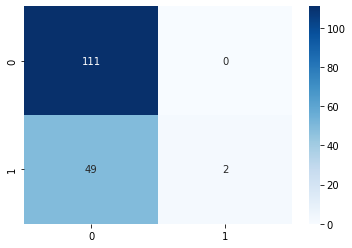

In [121]:
# Model-1
BNBmodel = BernoulliNB()
BNBmodel.fit(X_train, y_train)
model_Evaluate(BNBmodel)
y_pred1 = BNBmodel.predict(X_test)

              precision    recall  f1-score   support

           0       0.78      0.93      0.85       111
           1       0.73      0.43      0.54        51

    accuracy                           0.77       162
   macro avg       0.76      0.68      0.70       162
weighted avg       0.77      0.77      0.75       162



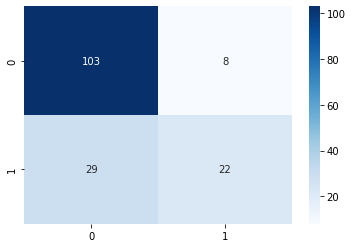

In [122]:
#model-2
SVCmodel = LinearSVC()
SVCmodel.fit(X_train, y_train)
model_Evaluate(SVCmodel)
y_pred2 = SVCmodel.predict(X_test)

              precision    recall  f1-score   support

           0       0.69      1.00      0.82       111
           1       1.00      0.02      0.04        51

    accuracy                           0.69       162
   macro avg       0.84      0.51      0.43       162
weighted avg       0.79      0.69      0.57       162



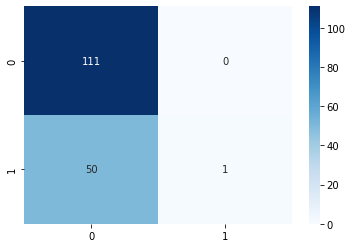

In [123]:
# model-3
LRmodel = LogisticRegression()
LRmodel.fit(X_train, y_train)
model_Evaluate(LRmodel)
y_pred3 = LRmodel.predict(X_test)

              precision    recall  f1-score   support

           0       0.75      0.98      0.85       111
           1       0.88      0.29      0.44        51

    accuracy                           0.77       162
   macro avg       0.82      0.64      0.65       162
weighted avg       0.79      0.77      0.72       162



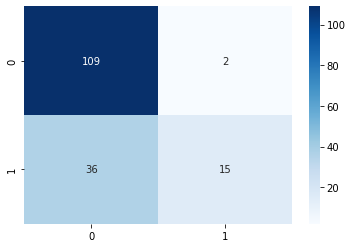

In [124]:
# model-4 
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
model_Evaluate(clf)
y_pred4 = clf.predict(X_test)

              precision    recall  f1-score   support

           0       0.69      1.00      0.82       111
           1       1.00      0.02      0.04        51

    accuracy                           0.69       162
   macro avg       0.84      0.51      0.43       162
weighted avg       0.79      0.69      0.57       162



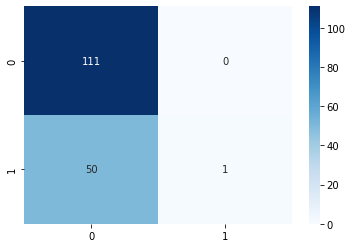

In [128]:
# model-5
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
MNBmodel = MultinomialNB()
MNBmodel.fit(X_train, y_train)
model_Evaluate(MNBmodel)
y_pred5 = BNBmodel.predict(X_test)

              precision    recall  f1-score   support

           0       0.72      0.68      0.70       111
           1       0.38      0.41      0.39        51

    accuracy                           0.60       162
   macro avg       0.55      0.55      0.55       162
weighted avg       0.61      0.60      0.60       162



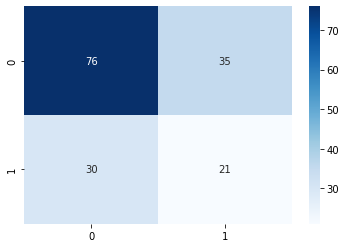

In [130]:
# model-6
GNBmodel = GaussianNB()
GNBmodel.fit(X_train, y_train)
model_Evaluate(GNBmodel)
y_pred6 = BNBmodel.predict(X_test)

              precision    recall  f1-score   support

           0       0.77      0.88      0.82       111
           1       0.63      0.43      0.51        51

    accuracy                           0.74       162
   macro avg       0.70      0.66      0.67       162
weighted avg       0.73      0.74      0.73       162



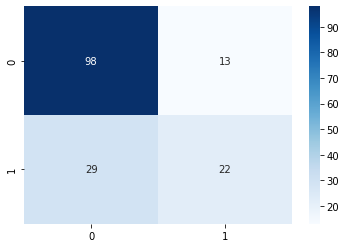

In [149]:
# model-7
import xgboost as xgb
# Initialize the classifier
xgb1 = xgb.XGBClassifier(random_state=42)
xgb1.fit(X_train, y_train)
model_Evaluate(xgb1)
y_pred7 = xgb1.predict(X_test)

### Inference-
-  We are getting good accuarcy with XGB classifier around 74 %

# lets tryout the Same with balnace Data

In [136]:
# using Resmaple module for smapling
from sklearn.utils import resample



# Separate majority and minority classes
df_majority = tweet_df[tweet_df.sentiments_num==0]
df_minority = tweet_df[tweet_df.sentiments_num==1]

# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=len(df_majority),    # match number of majority class samples
                                 random_state=123) # for reproducibility
 
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
 
# Display new class counts
print(df_upsampled.sentiments_num.value_counts())


0    548
1    548
Name: sentiments_num, dtype: int64


<AxesSubplot:>

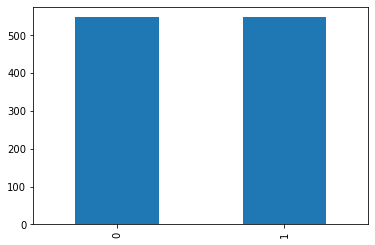

In [137]:
df_upsampled.sentiments_num.value_counts().plot(kind='bar')

In [138]:
X=df_upsampled.new_tweets
y=df_upsampled.sentiments_num

In [139]:
#Separating the 80% data for training data and 20% for testing data
from sklearn.model_selection import train_test_split
X_train_sa, X_test_sa, y_train_sa, y_test_sa = train_test_split(X,y,test_size = 0.20, random_state =45)

In [140]:
vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=10000)
vectoriser.fit(X_train_sa)
print('No. of feature_words: ', len(vectoriser.get_feature_names()))

No. of feature_words:  10000


C:\Users\91801\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [143]:
X_train_sa = vectoriser.transform(X_train_sa).toarray()
X_test_sa  = vectoriser.transform(X_test_sa).toarray()

In [141]:
X_train.shape

(648, 10000)

              precision    recall  f1-score   support

           0       0.68      0.97      0.80       111
           1       0.25      0.02      0.04        51

    accuracy                           0.67       162
   macro avg       0.47      0.50      0.42       162
weighted avg       0.55      0.67      0.56       162



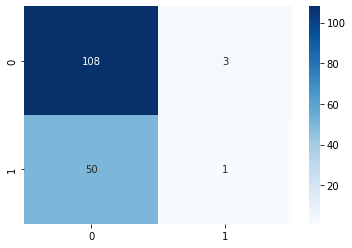

In [144]:
# model-8
import xgboost as xgb
# Initialize the classifier
xgb = xgb.XGBClassifier(random_state=42)
xgb.fit(X_train_sa, y_train_sa)
model_Evaluate(xgb)
y_pred8 = xgb.predict(X_test_sa)

              precision    recall  f1-score   support

           0       0.68      0.65      0.66       111
           1       0.30      0.33      0.32        51

    accuracy                           0.55       162
   macro avg       0.49      0.49      0.49       162
weighted avg       0.56      0.55      0.55       162



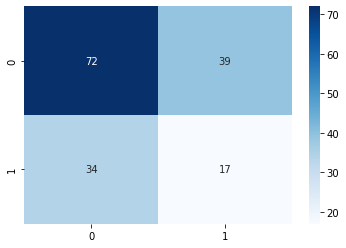

In [145]:
MNBmodel = MultinomialNB()
MNBmodel.fit(X_train_sa, y_train_sa)
model_Evaluate(MNBmodel)
y_pred8 = BNBmodel.predict(X_test_sa)

              precision    recall  f1-score   support

           0       0.68      0.93      0.79       111
           1       0.27      0.06      0.10        51

    accuracy                           0.65       162
   macro avg       0.48      0.49      0.44       162
weighted avg       0.55      0.65      0.57       162



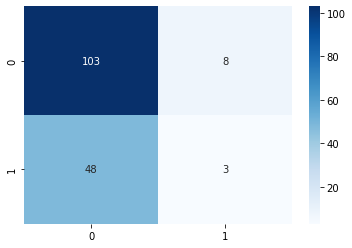

In [146]:
#model-2
SVCmodel = LinearSVC()
SVCmodel.fit(X_train_sa, y_train_sa)
model_Evaluate(SVCmodel)
y_pred2 = SVCmodel.predict(X_test_sa)

# Conclusion:
- 1- We have imported  tweets using SNScraping module regarding Hindenberg Report for Adani
- 2- We have Implemented Text Preprocessing like Text cleaning,Tokenization,stemming, lemmatization etc
- 3-We have Transform the data using TF-IDF Vectorizer
- 4-.we have tested our data with various machine learning models.
- 5- SVM classifer with linear kernal performing well which is giving accuracy near about 77 % 
- 6- We are getting descent accuarcy with XGB classifier around 74 % 
- 7- When we are balancing Data our Accuracy and recall is getting Down..we can work more on it to Improve the results